# Amazon Market Data: Exploratory Data Analysis

### Objective:
Build upon Pivot Table Analysis in MS Excel Spreadsheet to uncover further interesting trends within data.
Identify applicable visualizations for final report/dashboard aimed at stakeholders.

### Import relevant modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

### Load data into DataFrame

In [2]:
df = pd.read_excel("amazon_data_FINAL.xlsx", sheet_name="Data")
df

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport
0,308,SHOKZ,2023-07-17,2023-07-23 05:20:17.944,7,False,146.70,False,False,True,10581,4.6,0.04,0.02,0.05,0.12,0.78,False
1,274,JBL,2023-07-17,2023-07-24 00:00:00.000,7,True,74.95,False,False,True,12123,4.3,0.07,0.04,0.06,0.15,0.68,False
2,134,Samsung,2023-07-17,2023-07-23 00:00:00.000,6,True,187.99,False,False,True,2587,4.5,0.05,0.03,0.04,0.12,0.77,False
3,728,TOZO,2023-07-17,2023-07-23 00:00:00.000,6,True,39.99,False,True,True,30530,4.3,0.07,0.04,0.08,0.19,0.62,False
4,367,Samsung,2023-07-17,2023-08-06 00:00:00.000,20,True,99.99,False,False,True,29956,4.4,0.05,0.03,0.06,0.13,0.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,128,MOZOTER,2023-07-17,2023-07-23 00:00:00.000,6,True,18.99,False,True,True,7211,4.3,0.06,0.04,0.08,0.17,0.65,False
1138,183,Dascert,2023-07-17,2023-08-04 00:00:00.000,18,True,39.98,False,True,True,17420,4.3,0.07,0.04,0.08,0.15,0.65,False
1139,18,PSIER,2023-07-17,2023-07-25 00:00:00.000,8,True,29.99,False,True,True,193,4.5,0.04,0.04,0.05,0.13,0.74,False
1140,27,Ltinist,2023-07-17,2023-07-23 00:00:00.000,6,True,35.99,False,True,True,1877,4.6,0.04,0.02,0.03,0.08,0.83,False


### Remove unnecassary time information from deliveryDate column

In [3]:
df['deliveryDate'] = df['deliveryDate'].dt.date
df

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport
0,308,SHOKZ,2023-07-17,2023-07-23,7,False,146.70,False,False,True,10581,4.6,0.04,0.02,0.05,0.12,0.78,False
1,274,JBL,2023-07-17,2023-07-24,7,True,74.95,False,False,True,12123,4.3,0.07,0.04,0.06,0.15,0.68,False
2,134,Samsung,2023-07-17,2023-07-23,6,True,187.99,False,False,True,2587,4.5,0.05,0.03,0.04,0.12,0.77,False
3,728,TOZO,2023-07-17,2023-07-23,6,True,39.99,False,True,True,30530,4.3,0.07,0.04,0.08,0.19,0.62,False
4,367,Samsung,2023-07-17,2023-08-06,20,True,99.99,False,False,True,29956,4.4,0.05,0.03,0.06,0.13,0.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,128,MOZOTER,2023-07-17,2023-07-23,6,True,18.99,False,True,True,7211,4.3,0.06,0.04,0.08,0.17,0.65,False
1138,183,Dascert,2023-07-17,2023-08-04,18,True,39.98,False,True,True,17420,4.3,0.07,0.04,0.08,0.15,0.65,False
1139,18,PSIER,2023-07-17,2023-07-25,8,True,29.99,False,True,True,193,4.5,0.04,0.04,0.05,0.13,0.74,False
1140,27,Ltinist,2023-07-17,2023-07-23,6,True,35.99,False,True,True,1877,4.6,0.04,0.02,0.03,0.08,0.83,False


### Confirm that all duplicates and blanks were removed during MS Excel data cleaning

In [4]:
print(f"Duplicate number: {df.duplicated().sum()}")
print(f"Blank number: {df.isna().sum().sum()}")

Duplicate number: 0
Blank number: 0


## One dimensional data analysis

### Objectives:
1. Identify outliers and handle if prudent
2. Visualize the distribution of each feature independently

### Histograms

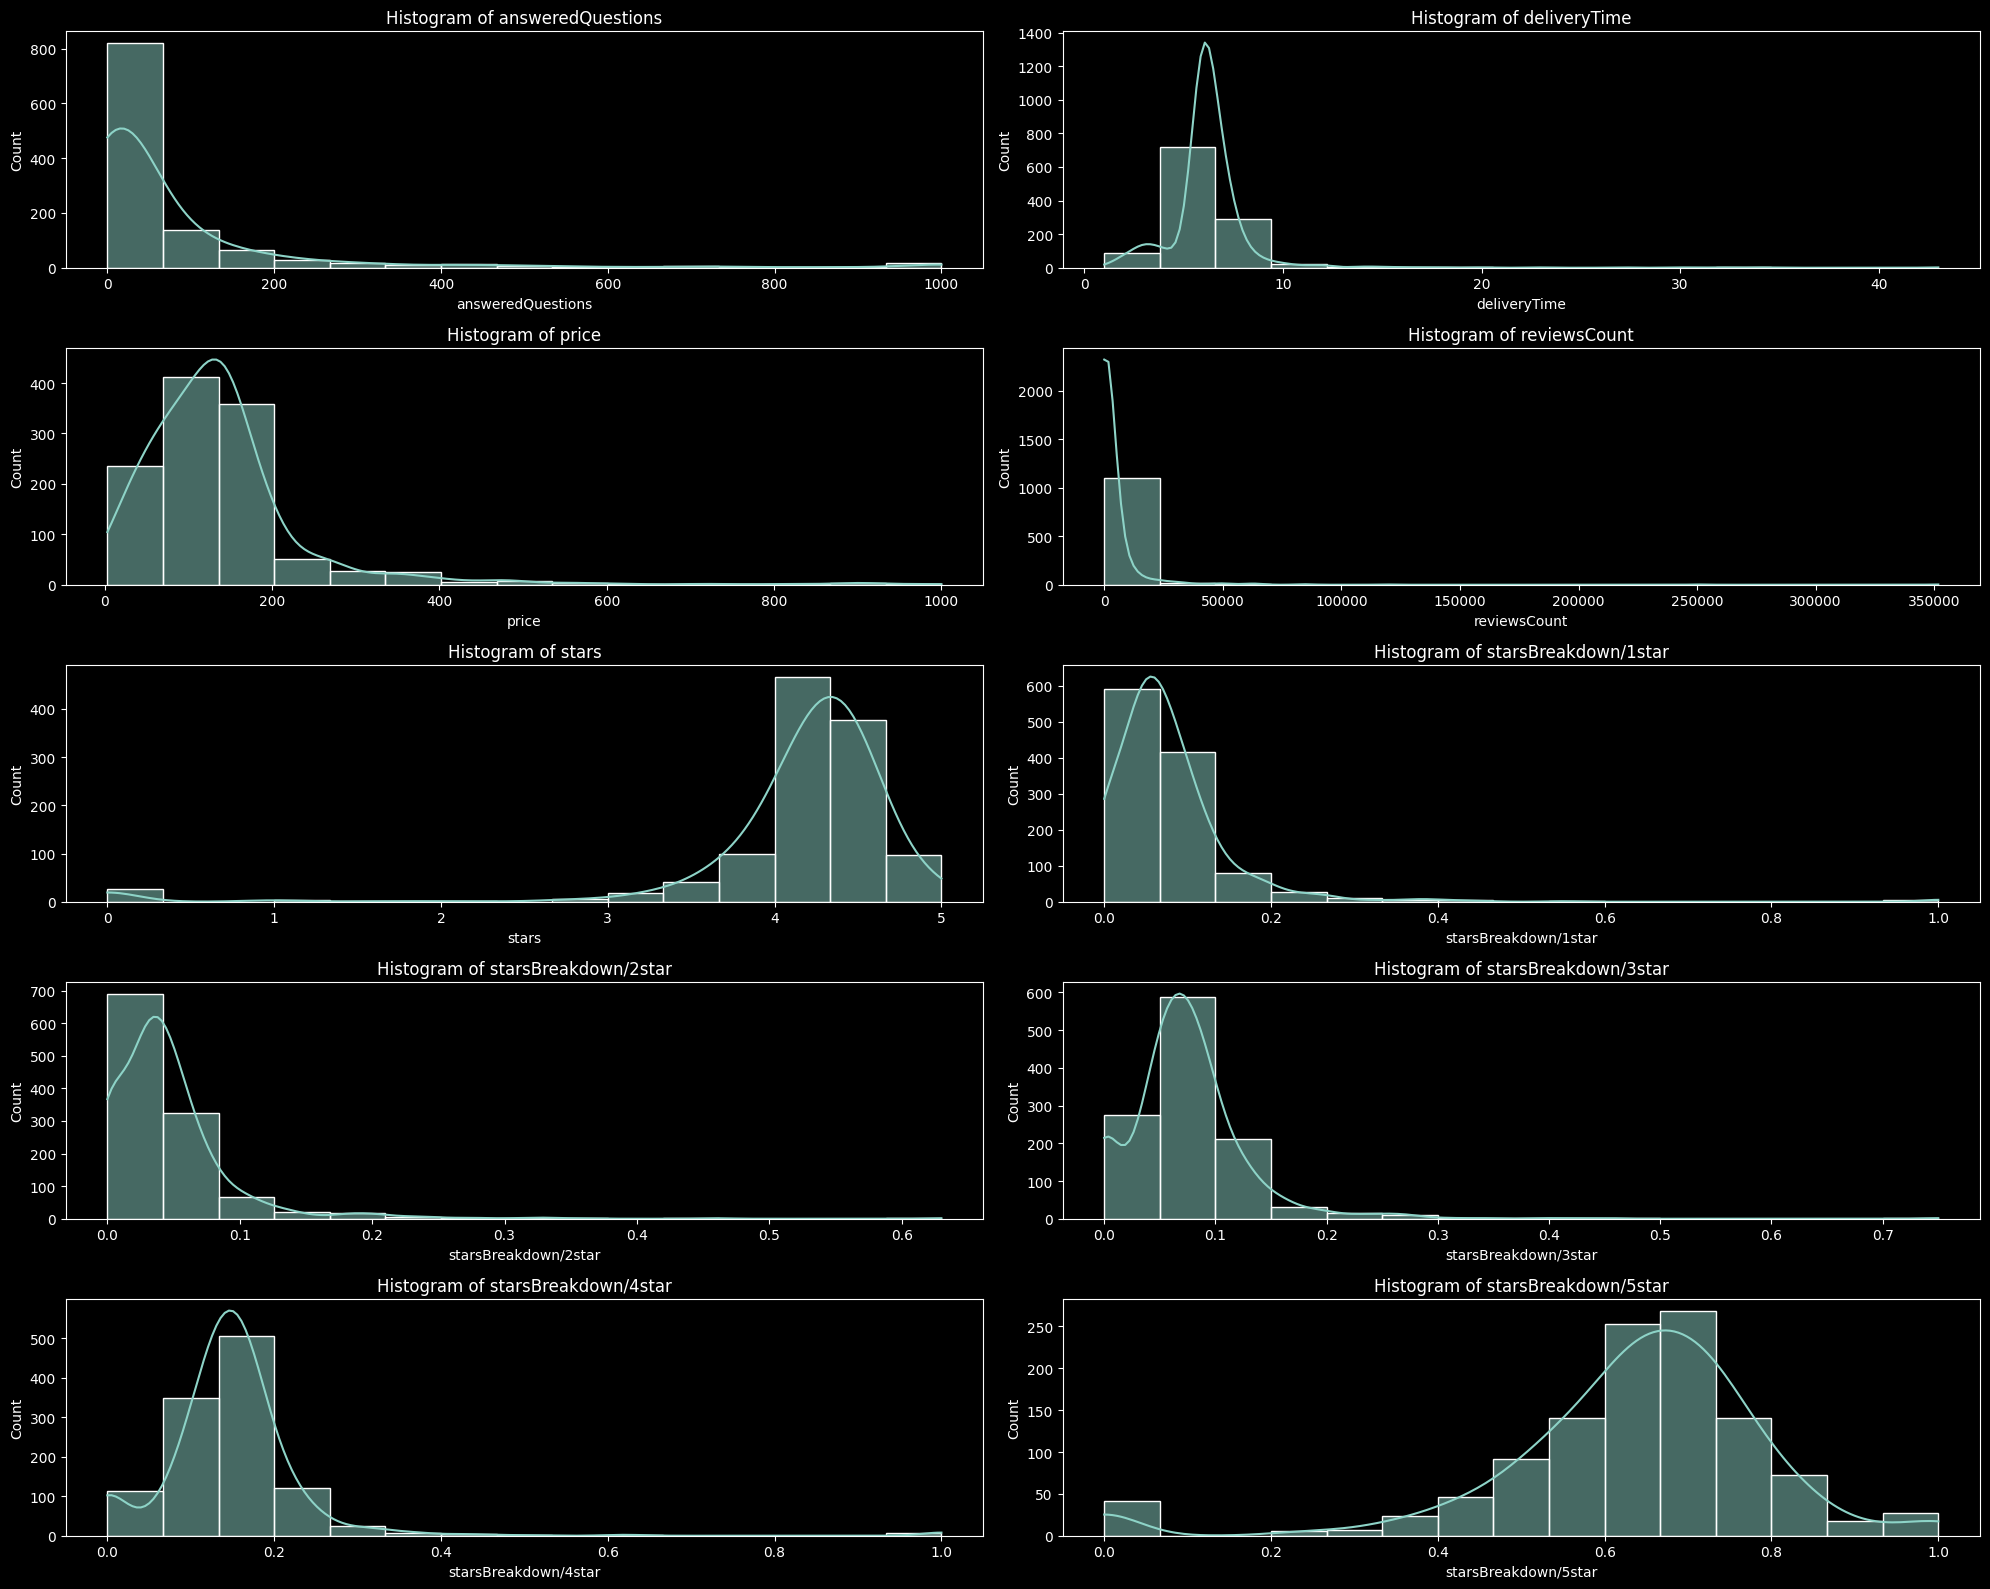

In [31]:
hist_feats = ['answeredQuestions', 'deliveryTime', 'price', 'reviewsCount', 'stars',
              'starsBreakdown/1star', 'starsBreakdown/2star', 'starsBreakdown/3star',
              'starsBreakdown/4star', 'starsBreakdown/5star']

hist_df = df[hist_feats]

# Determine the number of subplots
num_features = hist_df.shape[1]
num_rows = int(np.ceil(num_features / 2))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create histograms on each subplot
for i, feature in enumerate(hist_df.columns):
    sns.histplot(data=df, x=feature, bins=15, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')

# Remove empty subplots if any
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust spacing between subplots
plt.tight_layout()
plt.style.use('dark_background')

# Display the plot
plt.show()

#### Observations:

Outliers exist for all numerical features. However, they are all relevant since they are representative of the real-world marketplace for headphones so outliers may convey exceptional products.

Further analysis via boxplots may yield further details regarding the outliers.

### Boxplots

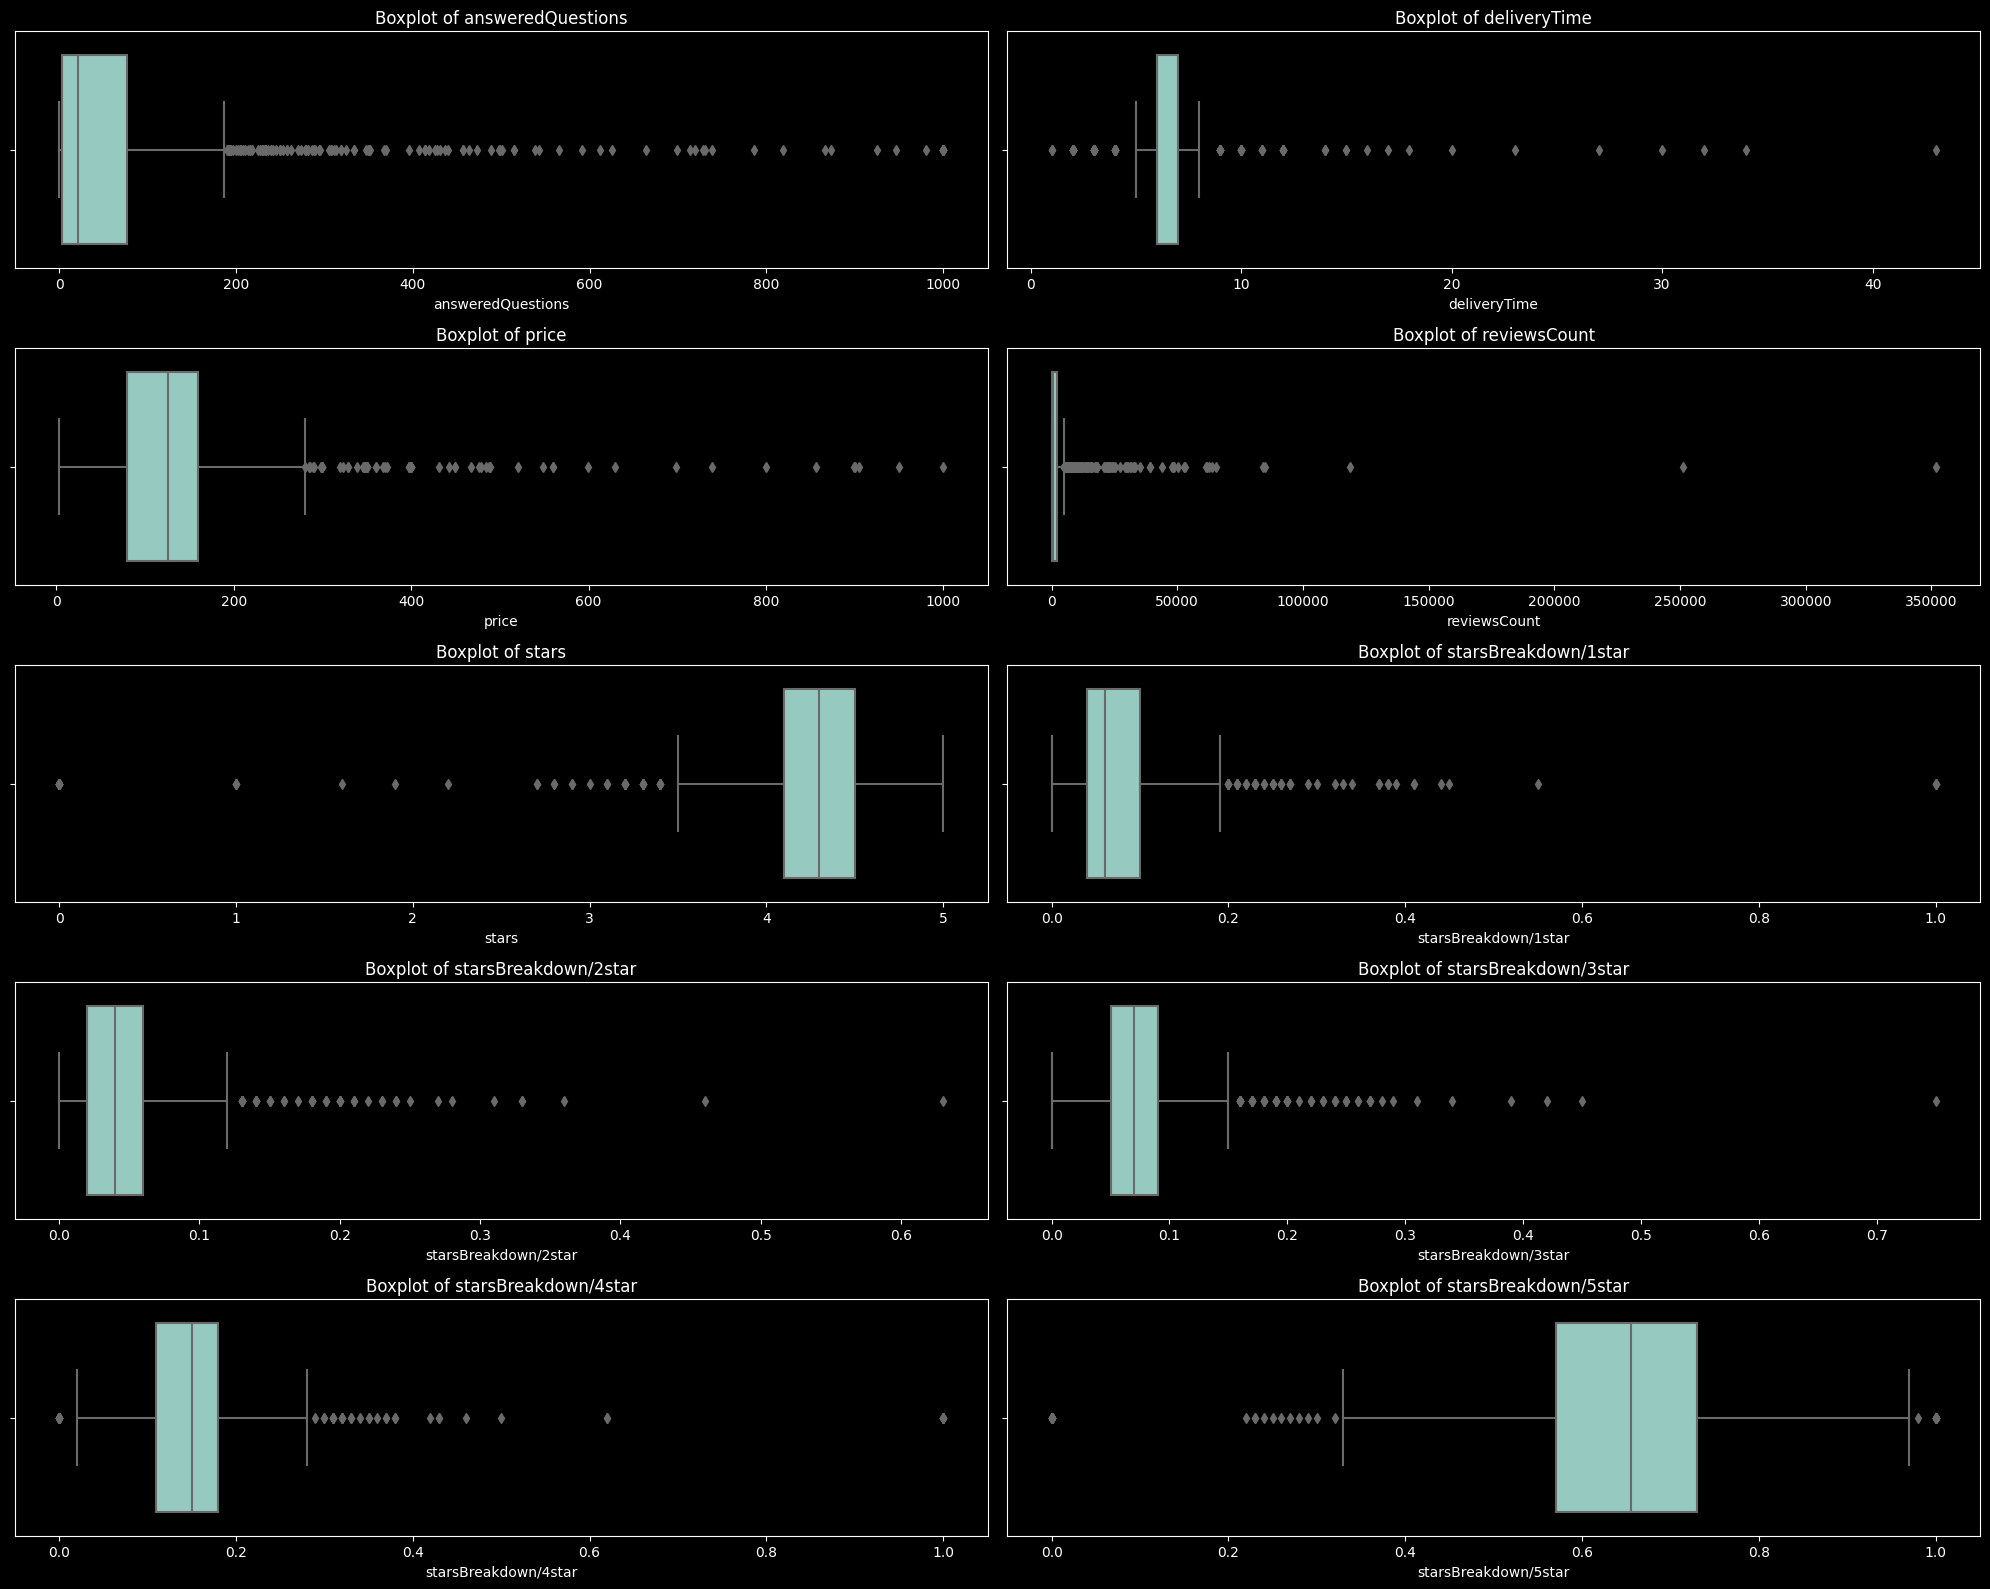

In [32]:
# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create histograms on each subplot
for i, feature in enumerate(hist_df.columns):
    sns.boxplot(x=hist_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove empty subplots if any
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust spacing between subplots
plt.tight_layout()
plt.style.use('dark_background')

# Display the plot
plt.show()

### Observations:

1. The majority of ratings are 5 stars, with less than 20% 4 star and less than 10% for 1, 2, and 3 stars each.
2. As elborated on previously, all outliers in this context are valid as they represent the online personal audio equipment market.

#### Assumption:
The company is selling their new headphone products at no more than $750 (typical upper price range for headphones); so products with price greater than $1000 will be removed from the dataset

### Price outlier omission

In [5]:
df = df[df['price'] <= 1000]
df

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport
0,308,SHOKZ,2023-07-17,2023-07-23,7,False,146.70,False,False,True,10581,4.6,0.04,0.02,0.05,0.12,0.78,False
1,274,JBL,2023-07-17,2023-07-24,7,True,74.95,False,False,True,12123,4.3,0.07,0.04,0.06,0.15,0.68,False
2,134,Samsung,2023-07-17,2023-07-23,6,True,187.99,False,False,True,2587,4.5,0.05,0.03,0.04,0.12,0.77,False
3,728,TOZO,2023-07-17,2023-07-23,6,True,39.99,False,True,True,30530,4.3,0.07,0.04,0.08,0.19,0.62,False
4,367,Samsung,2023-07-17,2023-08-06,20,True,99.99,False,False,True,29956,4.4,0.05,0.03,0.06,0.13,0.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,128,MOZOTER,2023-07-17,2023-07-23,6,True,18.99,False,True,True,7211,4.3,0.06,0.04,0.08,0.17,0.65,False
1138,183,Dascert,2023-07-17,2023-08-04,18,True,39.98,False,True,True,17420,4.3,0.07,0.04,0.08,0.15,0.65,False
1139,18,PSIER,2023-07-17,2023-07-25,8,True,29.99,False,True,True,193,4.5,0.04,0.04,0.05,0.13,0.74,False
1140,27,Ltinist,2023-07-17,2023-07-23,6,True,35.99,False,True,True,1877,4.6,0.04,0.02,0.03,0.08,0.83,False


### Boolean features

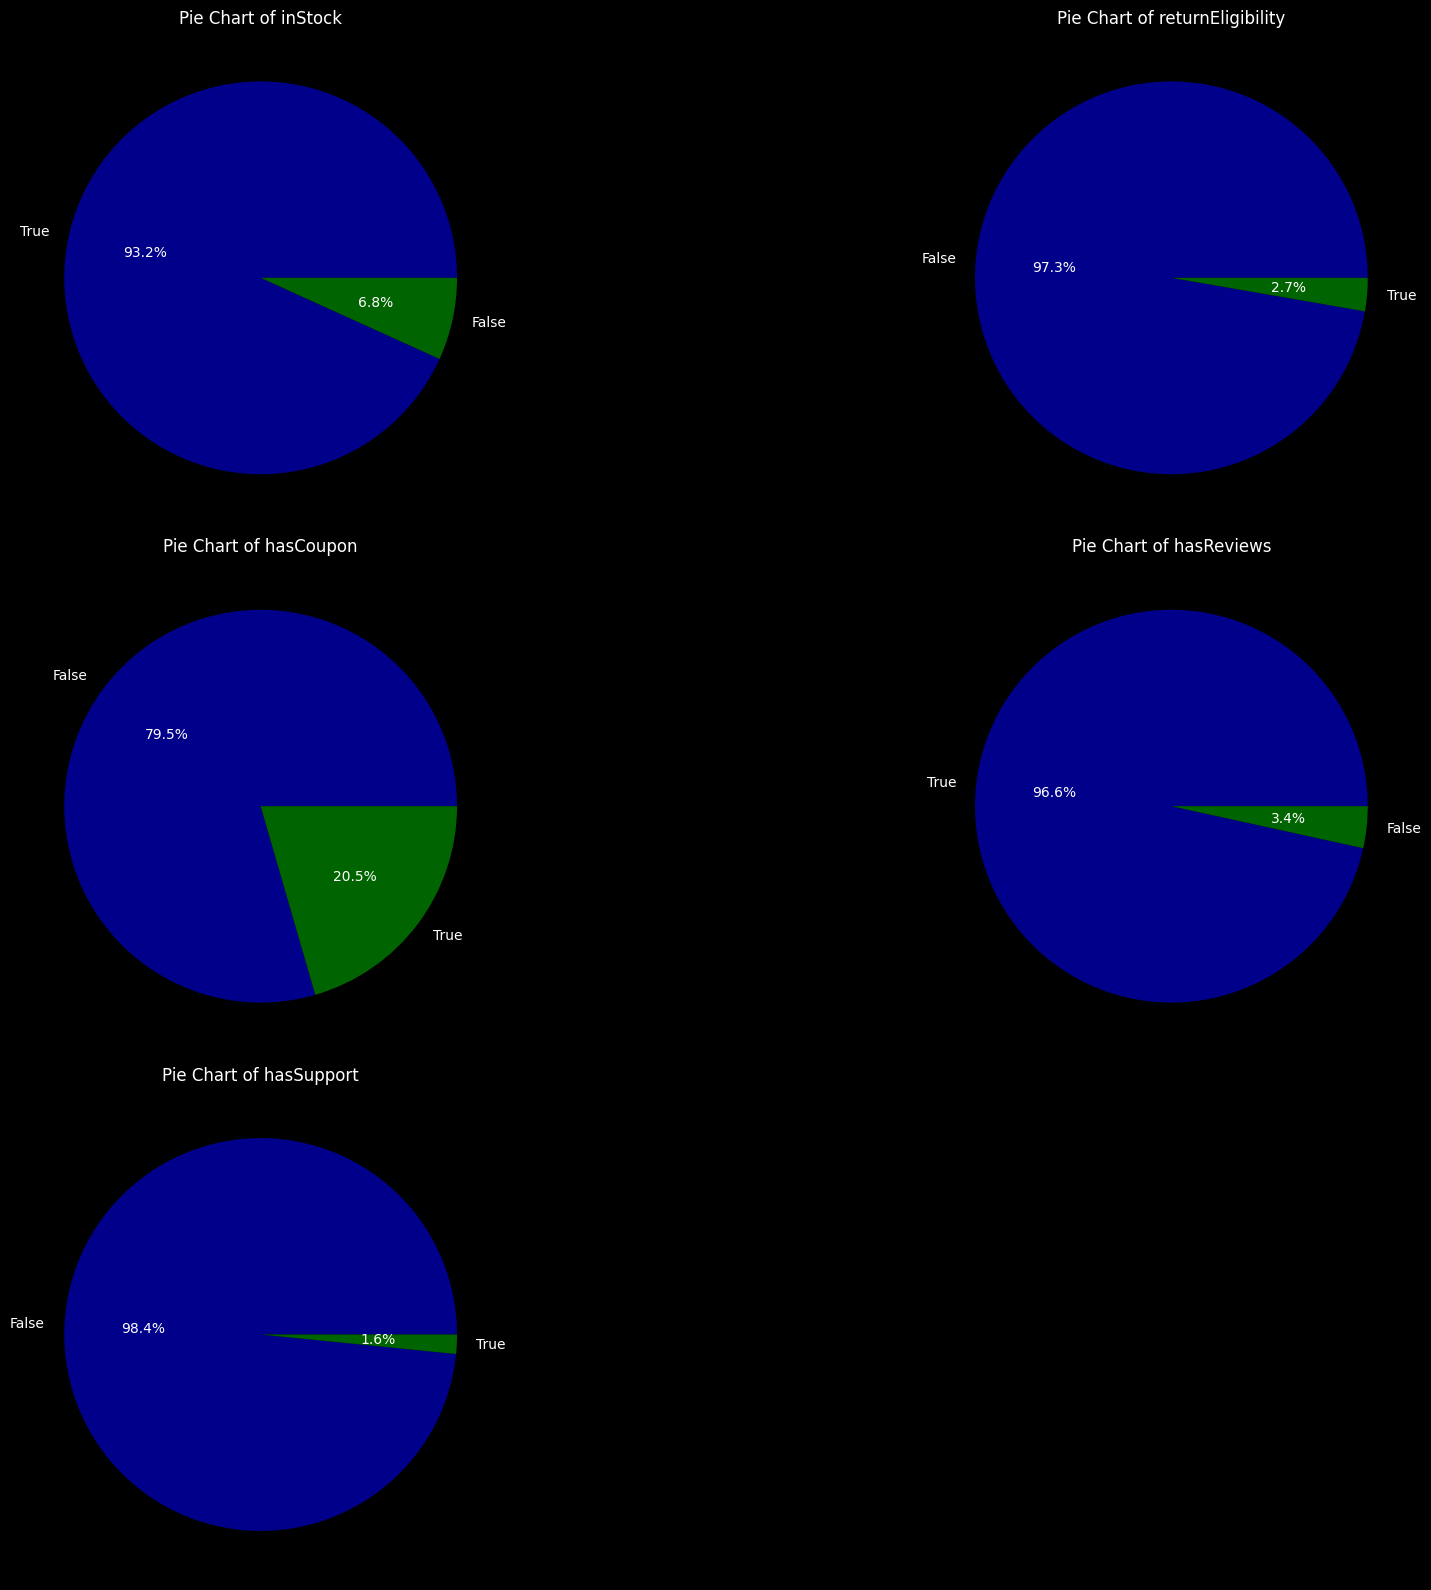

In [49]:
pie_feats = ['inStock', 'returnEligibility', 'hasCoupon', 'hasReviews', 'hasSupport']

pie_df = df[pie_feats]

# Determine the number of subplots
num_features = pie_df.shape[1]
num_rows = int(np.ceil(num_features / 2))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create histograms on each subplot
for i, feature in enumerate(pie_df.columns):
    temp = pie_df[feature].value_counts()
    temp.plot.pie(autopct='%1.1f%%', ax=axes[i], ylabel='', colors=['darkblue', 'darkgreen'])
    axes[i].set_title(f'Pie Chart of {feature}')

# Remove empty subplots if any
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust spacing between subplots
plt.tight_layout()
plt.style.use('dark_background')

# Display the plot
plt.show()

### Observation:

Generally, the boolean features are heavily skewed; thus, when comparing the popularity of products in relation to each boolean feature's value, averages star ratings should be applied rather than the conventional sums since the disparity in value counts would favour the dominant option by default.

## Multi-dimensional data analysis

## Key Points to explore

1. Relationship between number of reviews and price
2. Average number of reviews and price for each overall product rating value
3. Relationship between delivery time and average rating
4. Variation in average rating with respect to number of questions answered (by seller)
5. Most expensive brands
6. Relationship between coupon offering and price/average rating
7. Most popular brands
8. Relationship between returns eligibility and average rating/popularity

### 1. Relationship between number of reviews and price

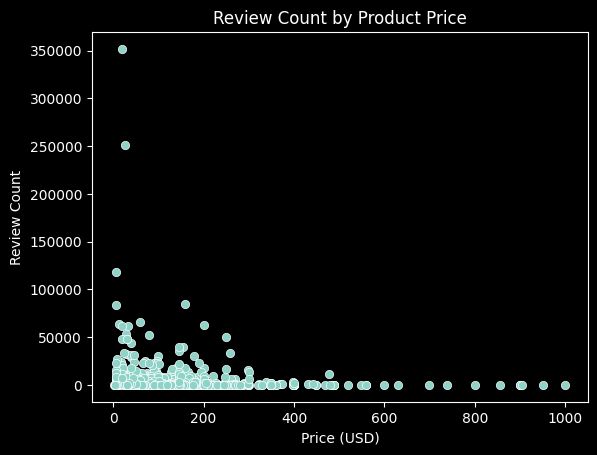

Correlation betwen price and review count: -0.12256592695803788


In [28]:
sns.scatterplot(data=df, x="price", y="reviewsCount")
plt.xlabel('Price (USD)')
plt.ylabel('Review Count')
plt.title('Review Count by Product Price')
plt.style.use('dark_background')
plt.show()
plt.close()

corr = df['price'].corr(df['reviewsCount'])
print(f"Correlation betwen price and review count: {corr}")

### Finding:
Negligble variation in review count as a function of price

### 2. Average number of reviews and price for each overall product rating value

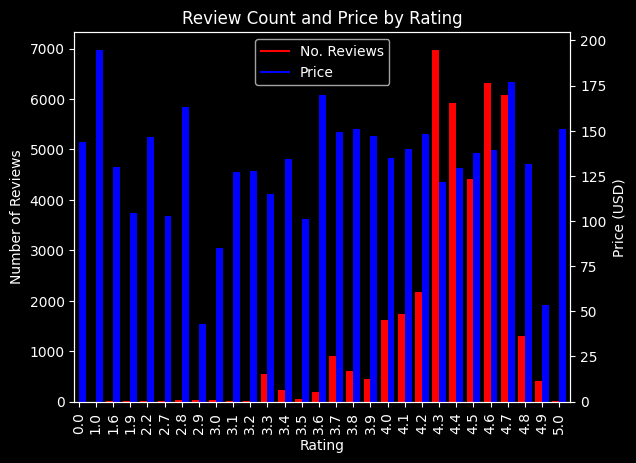

In [27]:
df_rating = df.groupby('stars')
avg_review_rating = df_rating['reviewsCount'].mean()
avg_price_rating = df_rating['price'].mean()

avg_rating_data = pd.concat([avg_review_rating, avg_price_rating], axis=1)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

avg_rating_data['reviewsCount'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
avg_rating_data['price'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Reviews')
ax2.set_ylabel('Price (USD)')
ax.set_xlabel('Rating')
ax.set_title('Review Count and Price by Rating')

handles = [plt.Line2D([], [], color='red', label='No. Reviews'),
           plt.Line2D([], [], color='blue', label='Price')]
labels = ['No. Reviews', 'Price']
plt.style.use('dark_background')
plt.legend(handles=handles, labels=labels, loc='upper center')

plt.show()
plt.close()

### 3. Relationship between delivery time and rating

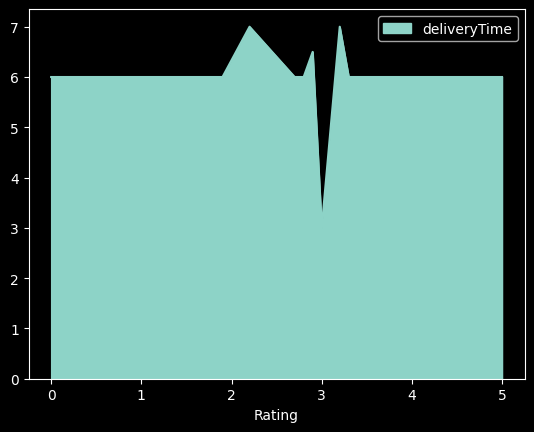

Correlation betwen rating and delivery time: -0.04702247888111771


In [25]:
df_del_rat = df.groupby('stars')['deliveryTime'].median().reset_index().sort_values('stars', ascending=True)
plt.style.use('dark_background')
df_del_rat.plot.area(x='stars', y='deliveryTime')
plt.xlabel('Rating')
plt.ylabel
plt.show()
plt.close()

corr = df['stars'].corr(df['deliveryTime'])
print(f"Correlation betwen rating and delivery time: {corr}")

### Finding:

Minimal correlation between rating and delivery time

### 4. Link between product rating and number of product reviews

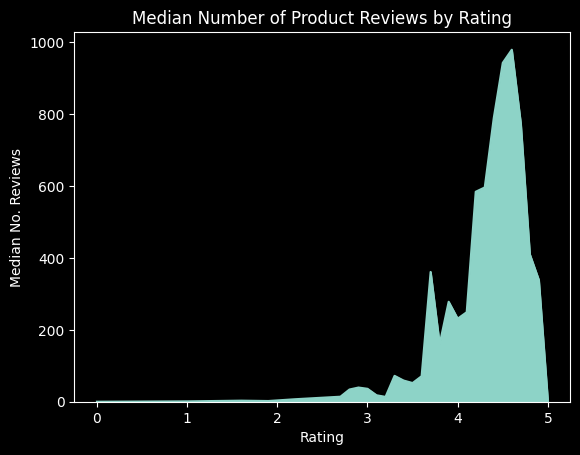

In [24]:
df_que_rat = df.groupby('stars')['reviewsCount'].median().reset_index().sort_values('stars', ascending=True)
plt.style.use('dark_background')
df_que_rat.plot.area(x='stars', y='reviewsCount', legend=False)
plt.xlabel('Rating')
plt.ylabel('Median No. Reviews')
plt.title('Median Number of Product Reviews by Rating')
plt.show()
plt.close()

### Finding:

Minimal correlation between answeredQuestions and stars.

### 5. Most expensive brands

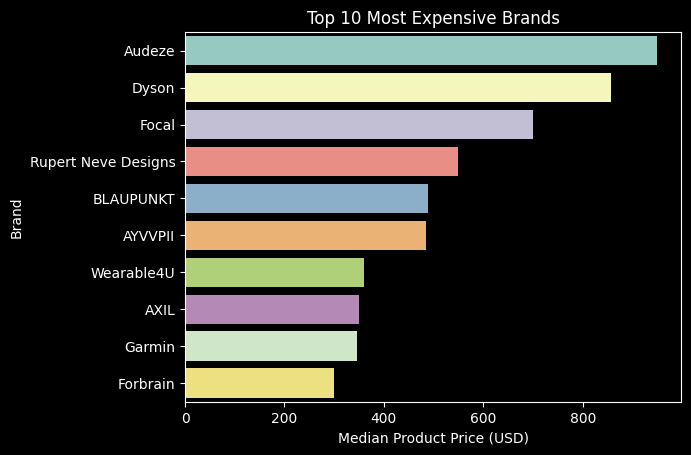

In [44]:
df_brand = df.groupby('brand')
avg_price = df_brand['price'].median().reset_index().sort_values('price', ascending=False).head(10)

sns.barplot(data=avg_price, x='price', y='brand', orient='h')

plt.style.use('dark_background')
plt.ylabel('Brand')
plt.xlabel('Median Product Price (USD)')
plt.title('Top 10 Most Expensive Brands')
plt.show()
plt.close()

### 6. Relationship between coupon availability and average rating and price

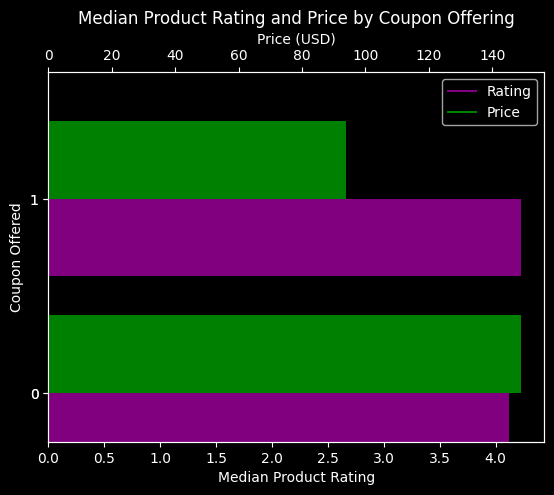

In [45]:
# Obtain mean star rating grouped by coupon options (true/false)
df_coupon = df.groupby('hasCoupon')
avg_rating_coup = df_coupon['stars'].mean().reset_index()
avg_price_coup = df_coupon['price'].mean()

avg_coup_data = pd.concat([avg_rating_coup, avg_price_coup], axis=1)

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twiny()

width = .4

avg_coup_data['stars'].plot(kind='barh', color='purple', ax=ax, width=width, position=1)
avg_coup_data['price'].plot(kind='barh', color='green', ax=ax2, width=width, position=0)

ax.set_xlabel('Median Product Rating')
ax2.set_xlabel('Price (USD)')
ax.set_ylabel('Coupon Offered')
ax.set_title('Median Product Rating and Price by Coupon Offering')

handles = [plt.Line2D([], [], color='purple', label='Rating'),
           plt.Line2D([], [], color='green', label='Price')]
labels = ['Rating', 'Price']
plt.legend(handles=handles, labels=labels)
plt.style.use('dark_background')
plt.show()
plt.close()

### Comment:
Although there appears to be very little difference between the average ratings, products w/ coupons have a higher rating by 0.11 stars; whilst this may seem relatively insignificant, analysis of review number as a function of rating indicates that even small variations in rating, when the overall rating ranges from 4 to 5 stars, has a major impact upon review count (and therefore total purchases).

### Most popular brands

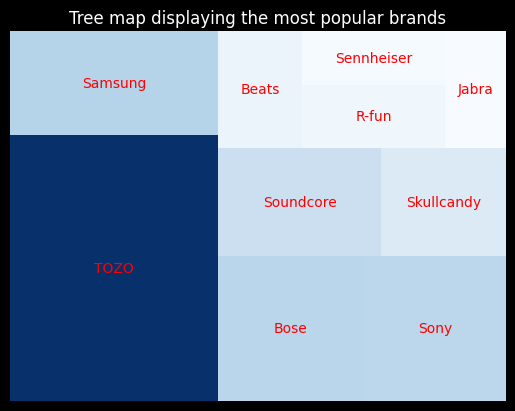

In [57]:
pop_brands = df_brand['reviewsCount'].sum().reset_index().sort_values('reviewsCount', ascending=False).head(10)

# Calculate the sizes for the tree map
sizes = pop_brands['reviewsCount'].values

# Assign colors to the tree map rectangles
cmap = plt.cm.Blues
color_values = pop_brands['reviewsCount'].values
norm = plt.Normalize(vmin=min(color_values), vmax=max(color_values))
colors = [cmap(norm(value)) for value in color_values]

# Create the tree map
squarify.plot(sizes=sizes, label=pop_brands['brand'], color=colors, text_kwargs={'color': 'red'})

# Add title and remove axis labels
plt.title('Tree map displaying the most popular brands')
plt.axis('off')
plt.style.use('dark_background')

# Display the plot
plt.show()
plt.close()

### 8. Relationship between returns eligibility and rating/popularity

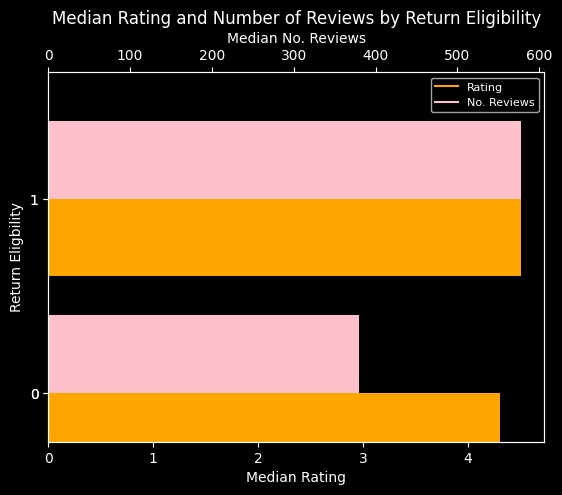

,returnEligibility,stars,reviewsCount
0,False,4.3,380.0
1,True,4.5,577.0


In [65]:
df_returns = df.groupby('returnEligibility')
rating_returns = df_returns['stars'].median().reset_index()
pop_returns = df_returns['reviewsCount'].median()

returns_data = pd.concat([rating_returns, pop_returns], axis=1)

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twiny()

width = .4

returns_data['stars'].plot(kind='barh', color='orange', ax=ax, width=width, position=1)
returns_data['reviewsCount'].plot(kind='barh', color='pink', ax=ax2, width=width, position=0)

ax.set_xlabel('Median Rating')
ax2.set_xlabel('Median No. Reviews')
ax.set_ylabel('Return Eligbility')
ax.set_title('Median Rating and Number of Reviews by Return Eligibility')

handles = [plt.Line2D([], [], color='orange', label='Rating'),
           plt.Line2D([], [], color='pink', label='No. Reviews')]
labels = ['Rating', 'No. Reviews']
plt.legend(handles=handles, labels=labels, loc='upper right', prop={'size': 8})
plt.style.use('dark_background')
plt.show()
plt.close()

returns_data

### Comment:
Products that allow returns have fewer average reviews (indicating lower overall popularity), but the median rating is 0.2 stars higher; as explained previously, in the 4 to 5 star range this variation is linked to significantly higher retail prices and review number, although the review numbers in this scenario do not support that link. A likely reason for this discrepancy is that more popular brands do not offer the prospect of product return since they do not require such a ploicy to attract customers. This idea will be further investigated next.

### Potential link between brand popularity and returns eligibility

In [117]:
pop_brands = df_brand['reviewsCount'].sum().reset_index()
brands_returns = df_brand['returnEligibility'].sum().reset_index()
brands_returns.drop('brand', axis=1, inplace=True)
brand_count = df_brand.size().reset_index().drop('brand', axis=1).rename(columns={0: 'count'})

ret_ratio = brands_returns['returnEligibility']/brand_count['count']
ret_ratio = ret_ratio.reset_index().rename(columns={0: 'returns_ratio'})

pop_brands_returns = pd.concat([pop_brands, brands_returns, brand_count, ret_ratio], axis=1)
pop_brands_returns = pop_brands_returns.sort_values('reviewsCount', ascending=False).head(20).drop('index', axis=1)

pop_brands_returns

,brand,reviewsCount,returnEligibility,count,returns_ratio
319,TOZO,732155,0,11,0.000000
289,Samsung,285981,0,31,0.000000
49,Bose,280043,0,21,0.000000
300,Sony,273703,2,70,0.028571
304,Soundcore,234394,0,22,0.000000
295,Skullcandy,179027,0,21,0.000000
39,Beats,130158,0,27,0.000000
270,R-fun,118691,0,1,0.000000
291,Sennheiser,101046,5,44,0.113636
157,Jabra,93653,0,41,0.000000


#### Comment:
The majority of 20 most reviewed brands (i.e. high selling brands) do not offer a return option for any of their products; since these brands posses the majoirty of overall reviews, this supports the notion that high-selling brands do not offer returns for numerous possible reasons (e.g. not requiring to do so to attract customers if customer satisfaction is high, logistical issues etc.).

## Data Export for Dashboard

The EDA has yielded useful insights into relevant trends within the dataset that can inform the client company about the market.

For stakeholders, a dashboard would be pertinent with regard to conveying the key trends in a user-friendly format. Thus, the DataFrame must be exported in suitable filetype (e.g. csv).

In [9]:
df.set_index('answeredQuestions').to_excel('dasboard_data.xlsx', sheet_name='Data')